<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_1_2_Maneras_de_Programar_a_una_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Maneras de Programar a una Red Neuronal - DOTCSV

## Código inicial

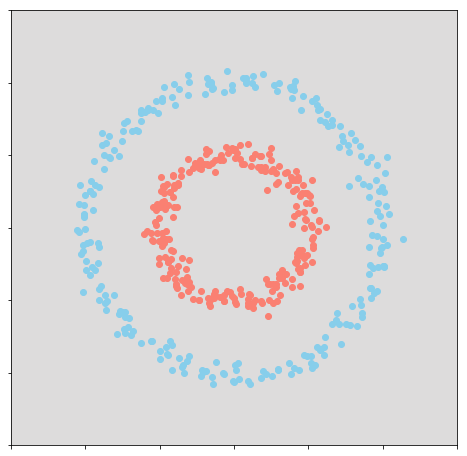

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar
# dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

## Tensorflow

Step 0 / 1000 - Loss =  0.29063216 - Acc = 0.562
Step 25 / 1000 - Loss =  0.18204297 - Acc = 0.632
Step 50 / 1000 - Loss =  0.1471082 - Acc = 0.79
Step 75 / 1000 - Loss =  0.13354021 - Acc = 0.854
Step 100 / 1000 - Loss =  0.122594796 - Acc = 0.902
Step 125 / 1000 - Loss =  0.111153014 - Acc = 0.942
Step 150 / 1000 - Loss =  0.09965967 - Acc = 0.956
Step 175 / 1000 - Loss =  0.08899061 - Acc = 0.968
Step 200 / 1000 - Loss =  0.07819476 - Acc = 0.98
Step 225 / 1000 - Loss =  0.06843367 - Acc = 0.984
Step 250 / 1000 - Loss =  0.059809823 - Acc = 0.992
Step 275 / 1000 - Loss =  0.051961992 - Acc = 0.994
Step 300 / 1000 - Loss =  0.04506078 - Acc = 0.996
Step 325 / 1000 - Loss =  0.03921565 - Acc = 0.998
Step 350 / 1000 - Loss =  0.034442045 - Acc = 1.0
Step 375 / 1000 - Loss =  0.030614918 - Acc = 1.0
Step 400 / 1000 - Loss =  0.027491104 - Acc = 1.0
Step 425 / 1000 - Loss =  0.024817096 - Acc = 1.0
Step 450 / 1000 - Loss =  0.022489877 - Acc = 1.0
Step 475 / 1000 - Loss =  0.020462362 - 

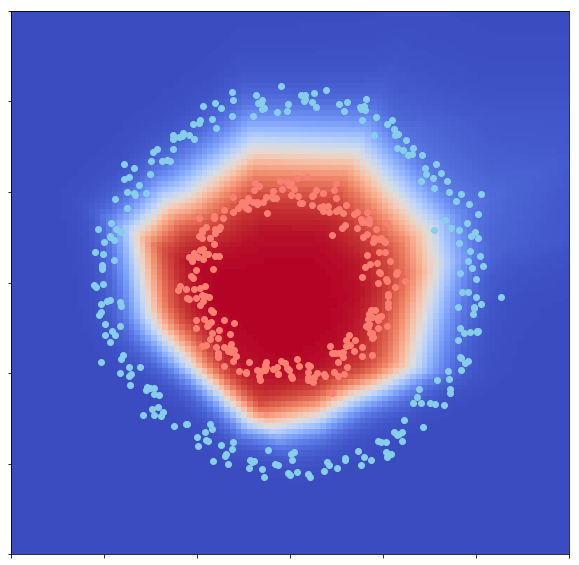

In [ ]:
import tensorflow as tf

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:

  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())

  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):

    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY.
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })

    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0:

      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)

      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)

      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)


# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):

  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

## Keras

In [ ]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks
model.fit(X, Y, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 111us/sample - loss: 0.2468 - acc: 0.5040
Epoch 2/100
500/500 [==============================] - 0s 37us/sample - loss: 0.2457 - acc: 0.5100
Epoch 3/100
500/500 [==============================] - 0s 40us/sample - loss: 0.2446 - acc: 0.5040
Epoch 4/100
500/500 [==============================] - 0s 37us/sample - loss: 0.2434 - acc: 0.5160
Epoch 5/100
500/500 [==============================] - 0s 36us/sample - loss: 0.2422 - acc: 0.5200
Epoch 6/100
500/500 [==============================] - 0s 39us/sample - loss: 0.2412 - acc: 0.5400
Epoch 7/100
500/500 [==============================] - 0s 38us/sample - loss: 0.2400 - acc: 0.5460
Epoch 8/100
500/500 [==============================] - 0s 38us/sample - loss: 0.2388 - acc: 0.5780
Epoch 9/100
500/500 [==============================] - 0s 41us/sample - loss: 0.2376 - acc: 0.5840
Epoch 10/100
500/500 [==============================] - 0s 41us/sample - loss: 0.2363 - acc: 0.5960
Epoch 11

## Sklearn

In [ ]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 0.66391606
Iteration 2, loss = 0.29448667
Iteration 3, loss = 0.13429471
Iteration 4, loss = 0.13165037
Iteration 5, loss = 0.13430276
Iteration 6, loss = 0.12556423
Iteration 7, loss = 0.12292571
Iteration 8, loss = 0.12204933
Iteration 9, loss = 0.12175702
Iteration 10, loss = 0.12129750
Iteration 11, loss = 0.12073281
Iteration 12, loss = 0.12028767
Iteration 13, loss = 0.11983928
Iteration 14, loss = 0.11939207
Iteration 15, loss = 0.11909108
Iteration 16, loss = 0.11836549
Iteration 17, loss = 0.11771654
Iteration 18, loss = 0.11703195
Iteration 19, loss = 0.11636100
Iteration 20, loss = 0.11559426
Iteration 21, loss = 0.11475135
Iteration 22, loss = 0.11391514
Iteration 23, loss = 0.11296898
Iteration 24, loss = 0.11183055
Iteration 25, loss = 0.11070522
Iteration 26, loss = 0.10945900
Iteration 27, loss = 0.10807801
Iteration 28, loss = 0.10653328
Iteration 29, loss = 0.10483565
Iteration 30, loss = 0.10299502
Iteration 31, loss = 0.10109678
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16, 8, 1), learning_rate='constant',
             learning_rate_init=0.01, max_iter=200, momentum=0.9,
             n_iter_no_change=1000, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)